In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Variables
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ...8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [38]:
# Loading Data
data = pd.read_csv('UCI_Credit_Card.csv')
# Inspecting Data; Preliminary Review 
data.info()
print('------------------------')
print(data.describe())
print('------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

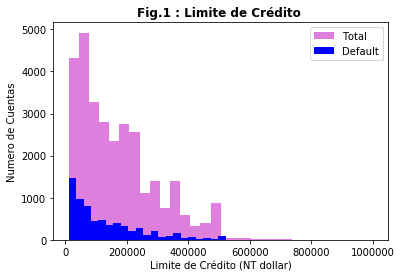

In [41]:
# Credit Limit (Feature name :'LIMIT_BAL' )
%matplotlib inline
bins = 30
plt.hist(data.LIMIT_BAL, bins = bins, color='m',label = 'Total',alpha=0.5)
plt.hist(data.LIMIT_BAL[data['default.payment.next.month'] == 1], bins = bins, color='b',label = 'Default')

plt.xlabel('Limite de Crédito (NT dollar)');plt.ylabel('Numero de Cuentas')
plt.title('Fig.1 : Limite de Crédito ',fontweight="bold", size=12)
plt.legend();plt.show()

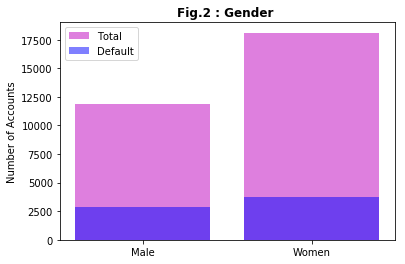

In [42]:
# Gender (Feature name :'SEX' )
men = data['SEX'][data['SEX']==1].count()
men_default = data['SEX'][(data['SEX']==1)&(data['default.payment.next.month']==1)].count()

women = data['SEX'][data['SEX']==2].count()
women_default = data['SEX'][(data['SEX']==2)&(data['default.payment.next.month']==1)].count()

total_sex = [men, women]
default_sex = [men_default,women_default]
gender = [1,2]
plt.bar(gender,total_sex, color='m',alpha=0.5, label='Total')
plt.bar(gender,default_sex, color='b',alpha=0.5, label='Default')

plt.xticks([1,2],['Male','Women']);plt.ylabel('Number of Accounts')
plt.title('Fig.2 : Gender ',fontweight="bold", size=12)
plt.legend();plt.show()

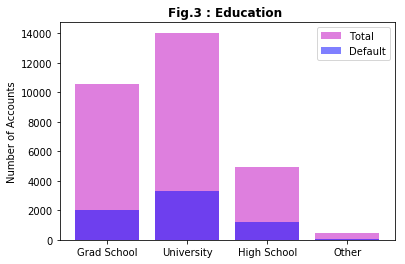

In [43]:
# Education (Feature name :'EDUCATION' )
grad =  data['EDUCATION'][data['EDUCATION']==1].count()
grad_default = data['EDUCATION'][(data['EDUCATION']==1)&(data['default.payment.next.month']==1)].count()

uni =  data['EDUCATION'][data['EDUCATION']==2].count()
uni_default = data['EDUCATION'][(data['EDUCATION']==2)&(data['default.payment.next.month']==1)].count()

high =  data['EDUCATION'][data['EDUCATION']==3].count()
high_default = data['EDUCATION'][(data['EDUCATION']==3)&(data['default.payment.next.month']==1)].count()

other =  data['EDUCATION'][data['EDUCATION'] > 3].count()
other_default = data['EDUCATION'][(data['EDUCATION'] > 3)&(data['default.payment.next.month']==1)].count()

total_education = [grad, uni, high, other]
default_education = [grad_default,uni_default,high_default, other_default]
degree = [1,2,3,4]
plt.bar(degree,total_education, color='m',alpha=0.5, label='Total')
plt.bar(degree,default_education, color='b',alpha=0.5, label='Default')

plt.xticks([1,2,3,4],['Grad School','University','High School','Other'])
plt.ylabel('Number of Accounts');plt.title('Fig.3 : Education ',fontweight="bold", size=12)
plt.legend();plt.show()


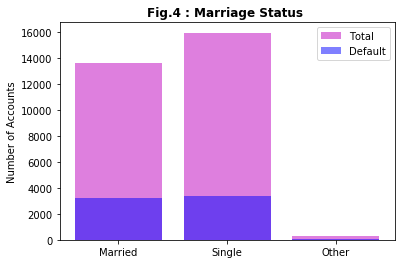

In [44]:
# Marriage Status (Feature name :'MARRIAGE')
married =  data['MARRIAGE'][data['MARRIAGE']==1].count()
married_default = data['MARRIAGE'][(data['MARRIAGE']==1)&(data['default.payment.next.month']==1)].count()

single =  data['MARRIAGE'][data['MARRIAGE']==2].count()
single_default = data['MARRIAGE'][(data['MARRIAGE']==2)&(data['default.payment.next.month']==1)].count()

other =  data['MARRIAGE'][data['MARRIAGE']==3].count()
other_default = data['MARRIAGE'][(data['MARRIAGE']==3)&(data['default.payment.next.month']==1)].count()

total_marriage = [married, single, other]
default_marriage = [married_default,single_default,other_default]
status = [1,2,3]
plt.bar(status,total_marriage, color='m',alpha=0.5, label='Total')
plt.bar(status,default_marriage, color='b',alpha=0.5, label='Default')

plt.xticks([1,2,3],['Married','Single','Other']); plt.ylabel('Number of Accounts')
plt.title('Fig.4 : Marriage Status ',fontweight="bold", size=12)
plt.legend(); plt.show()

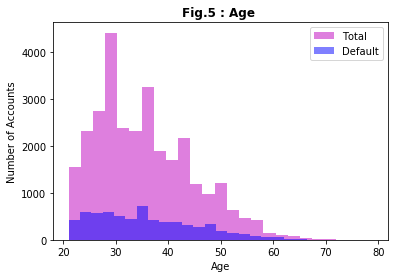

In [45]:
# Age (Feature name :'AGE' )
bins = 25

plt.hist(data['AGE'],bins = bins, color='m',label = 'Total',alpha=0.5)
plt.hist(data['AGE'][data['default.payment.next.month']==1], bins = bins, color='b',label = 'Default',alpha=0.5)

plt.xlabel('Age'); plt.ylabel('Number of Accounts')
plt.title('Fig.5 : Age ',fontweight="bold", size=12)
plt.legend();plt.show()

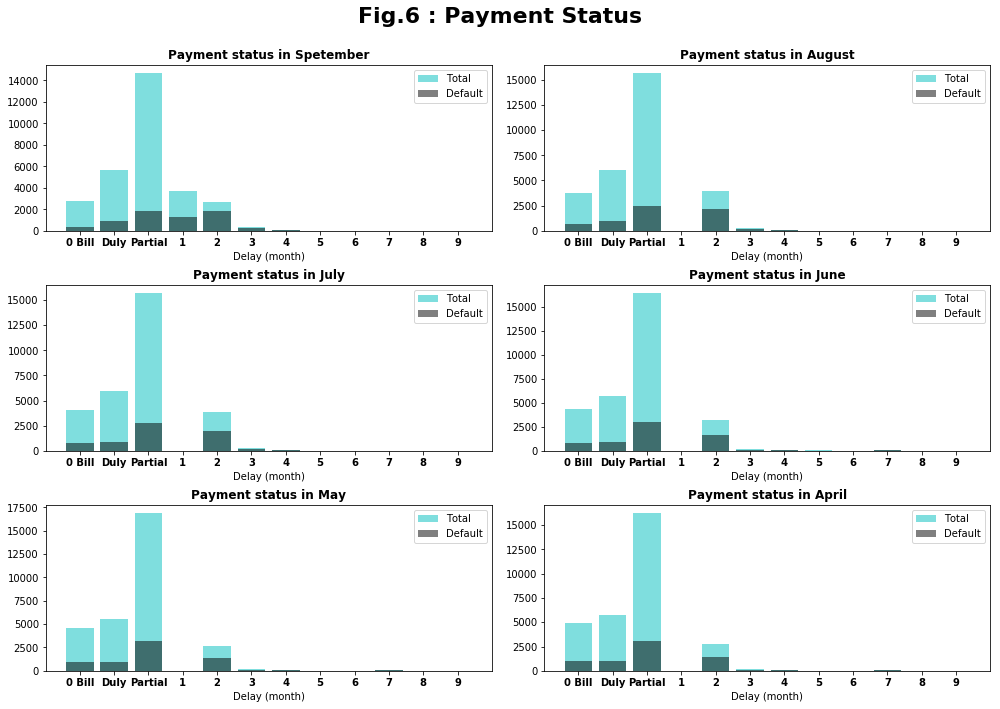

In [46]:
# Payment status (Feature name :'PAY_' )
import matplotlib.gridspec as gridspec
features = list(data.columns)
plt.figure(figsize=(14,10))

gs = gridspec.GridSpec(3,2)
i = 0

plt.suptitle('Fig.6 : Payment Status',fontweight="bold", fontsize=22)
for cn in features[6:12]:
    ax = plt.subplot(gs[i])
    delay = np.zeros(12)
    delay_default = np.zeros(12)  
    for j in np.arange(0,12):
            delay[j] = data[cn][data[cn]==j-2].count()
            delay_default[j] = data[cn][(data[cn]==j-2)&(data['default.payment.next.month']==1)].count()  

    month = [-2,-1,0,1,2,3,4,5,6,7,8,9]
    plt.bar(month,delay, color='c',alpha=0.5, label='Total')
    plt.bar(month,delay_default, color='k',alpha=0.5, label='Default')

    plt.xticks([-2,-1,0,1,2,3,4,5,6,7,8,9],['0 Bill','Duly','Partial','1','2','3','4','5','6','7','8','9'], fontweight="bold", size=10)
    ax.set_xlabel('Delay (month)')
    months = ['Spetember','August','July','June','May','April']
    ax.set_title('Payment status in ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1
    
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

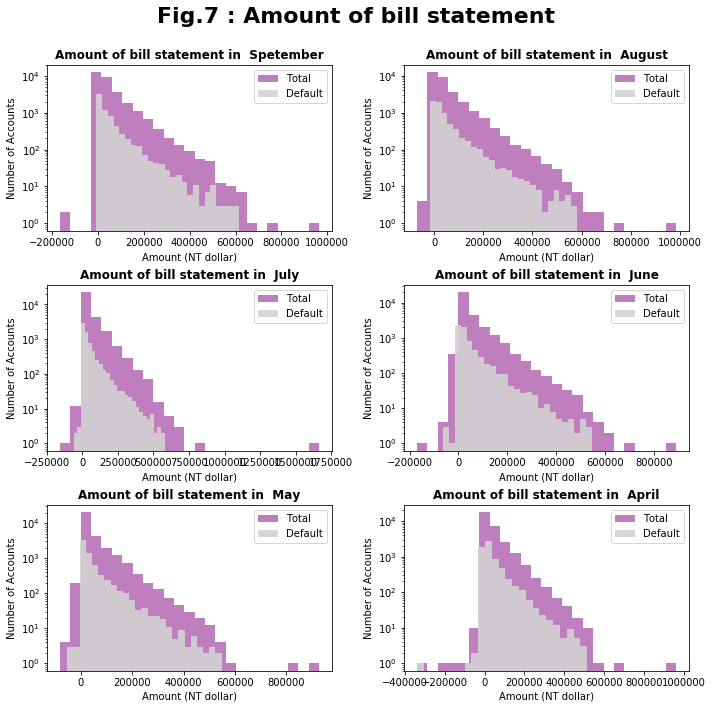

In [47]:
# Amount of bill statement (Feature name :'BILL_AMT_' )

features = list(data.columns)
plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3,2)
i = 0
plt.suptitle('Fig.7 : Amount of bill statement',fontweight="bold", fontsize=22)
for cn in features[12:18]:
    ax = plt.subplot(gs[i])
    bins = 25
    plt.hist(data[cn],bins = bins, color='purple',label = 'Total',alpha=0.5)
    plt.hist(data[cn][data['default.payment.next.month']==1], bins = bins, color='lightgray',label = 'Default',alpha=0.9)

    plt.xlabel('Amount (NT dollar)')
    plt.ylabel('Number of Accounts')
    ax.set_yscale('log', nonposy='clip')

    months = ['Spetember','August','July','June','May','April']
    ax.set_title('Amount of bill statement in  ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1  
    plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

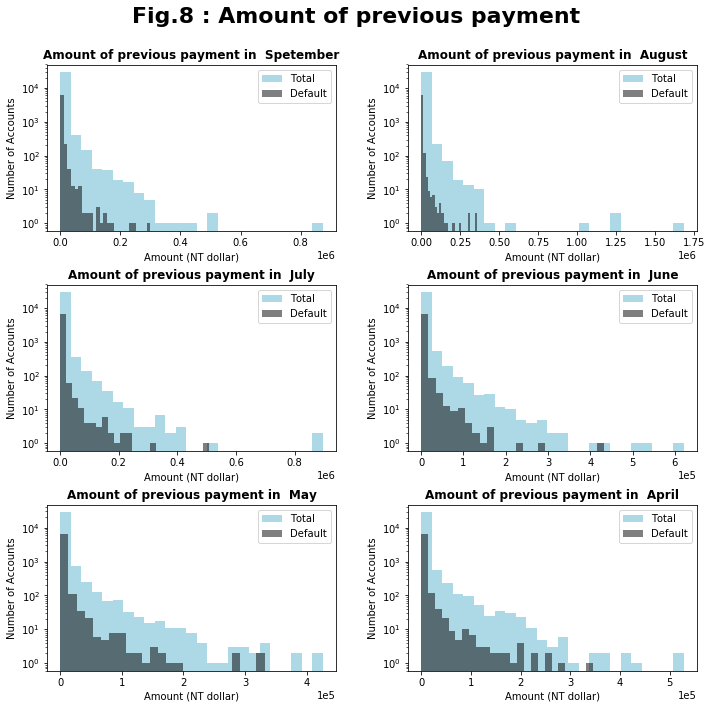

In [49]:
# Amount of previous payment (Feature name :'PAY_AMT_' )
features = list(data.columns)
plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3,2)
i = 0
plt.suptitle('Fig.8 : Amount of previous payment',fontweight="bold", fontsize=22)
for cn in features[18:24]:
    ax = plt.subplot(gs[i])
    bins = 25
    plt.hist(data[cn],bins = bins, color='lightblue',label = 'Total',alpha=1)
    plt.hist(data[cn][data['default.payment.next.month']==1], bins = bins, color='k',label = 'Default',alpha=0.5)

    plt.xlabel('Amount (NT dollar)')
    plt.ylabel('Number of Accounts')
    ax.set_yscale('log', nonposy='clip')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    months = ['Spetember','August','July','June','May','April']
    ax.set_title('Amount of previous payment in  ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1      
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


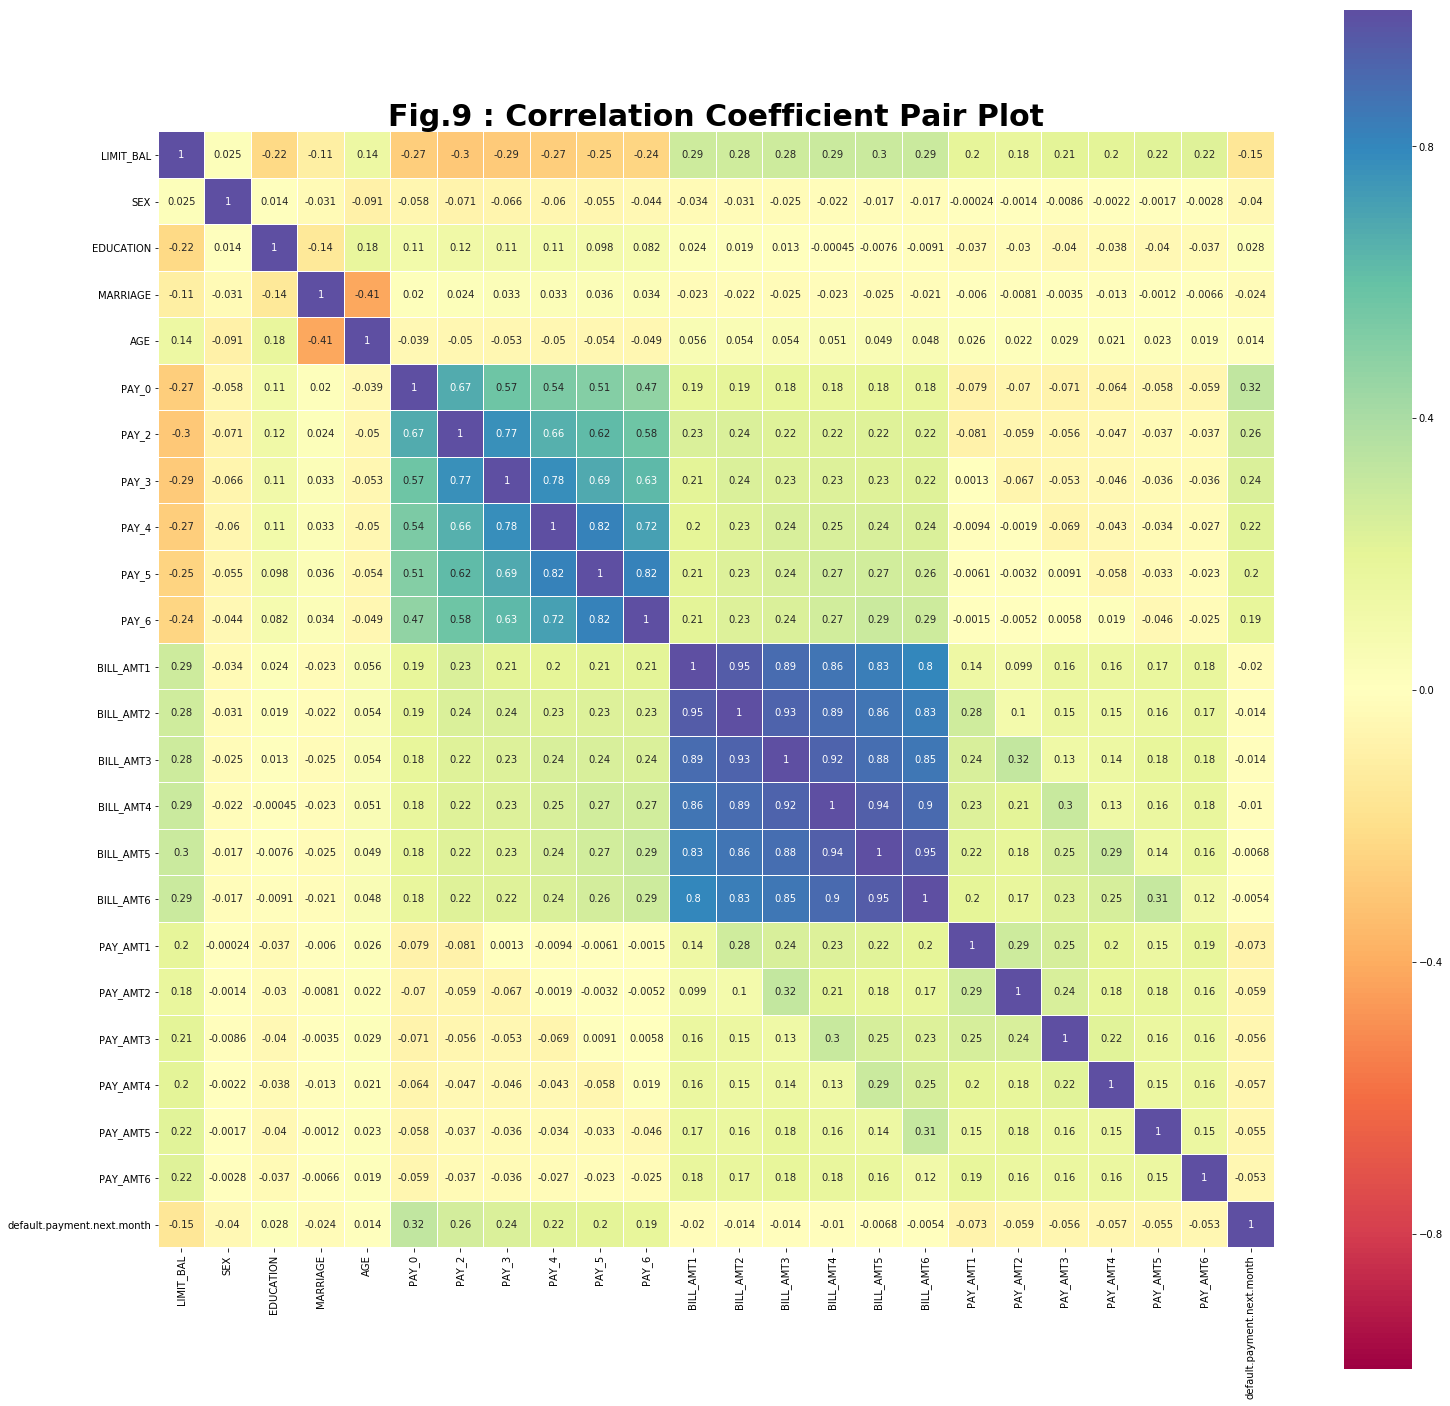

In [50]:
# Making correlation coefficients pair plot of all feature in order to identify degenrate features
plt.figure(figsize=(25,25))
ax = plt.axes()
corr = data.drop(['ID'], axis=1).corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Fig.9 : Correlation Coefficient Pair Plot',fontweight="bold", size=30)
plt.show()